In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Heatmap

A heatmap represents data in a matrix form as a map or diagram, showing the magnitude/intensity of numerical values represented with colours.
* You can use a heatmap to represent a numerical variable over two dimensions, for example:
  * A correlation plot, where there is a table with columns and indices representing the dataset variables, and each value in the table represents the correlation between 2 variables
  * Variation over time, where for example, you have a table where columns represent quarter and indices year, and each value in the table represents a given numerical value (like sales of some product, number of passengers etc.) in a given quarter of a given year
  * Patterns of missing values, or any other metrics that can be effectively encoded as colours.

Consider the insurance dataset
  * It has records on the relationship between personal attributes (age, gender, BMI: body mass index, family size, smoking habits), geographic factors, and their impact on medical insurance charges

In [3]:
df = pd.read_csv('insurance.csv')
df = df.sample(n=50, random_state=1)
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
559,19,male,35.5,0,no,northwest,1646.43
1087,57,male,31.5,0,no,northwest,11353.23
1020,51,male,37.0,0,no,southwest,8798.59


We will calculate correlation levels using: ``pearson``, which means we want to get the linear correlation among the variables

In [5]:
df_corr = df.corr(method='pearson')
df_corr

ValueError: could not convert string to float: 'male'

A heatmap with `sns.heatmap()` plots rectangular data as a colour-encoded matrix. The function documentation is [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). The arguments are:

* data, 
* `annot=True` to display the number in each cell, 
* `linewidth` to create a grid of cells, making the plot more visual; 
* and `cmap` for setting the colour [palette](https://seaborn.pydata.org/tutorial/color_palettes.html); you can also use [Matplotlib palette](https://matplotlib.org/stable/tutorials/colors/colormaps.html) 
* You also set the annotation font size with `annot_kws={size}`

In [ ]:
sns.set_theme(style="whitegrid")
sns.heatmap(data=df_corr, annot=True, linewidths=0.5, annot_kws={"size": 8},cmap='viridis')
plt.show()

It is worth removing the upper part in correlation heatmaps since it is repeated information.

* We create a mask to hide the upper part. We do that in the first two lines of code, where we create an array of zeros and set as true the upper diagonal. The upper diagonal will be hidden when you parse ``mask=mask`` at ``sns.heatmap()`` We will study them in more details correlation in upcoming lessons

In [7]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()

NameError: name 'df_corr' is not defined

In [13]:
df_practice = pd.read_csv('Features_data_set.csv')
df_practice.query('Store==1',inplace=True)
df_practice = df_practice[['Date','Temperature','Fuel_Price','CPI','Unemployment']]
df_practice.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment
0,05/02/2010,42.31,2.572,211.096358,8.106
1,12/02/2010,38.51,2.548,211.242170,8.106
2,19/02/2010,39.93,2.514,211.289143,8.106
3,26/02/2010,46.63,2.561,211.319643,8.106
4,05/03/2010,46.50,2.625,211.350143,8.106


In [11]:
df = pd.read_csv("UK_MacroData.csv")
df['year'] = df['Date'].str[:4]
df['quarter'] = df['Date'].str[-2:]
df.head()

,Date,GDP (£ m),CPI,Bank Rate,Gross Fixed Capital Formation (Investments),year,quarter
0,2000 Q1,401242,1.1,5.875,69114.0,2000,Q1
1,2000 Q2,404196,1.0,6.000,73074.0,2000,Q2
2,2000 Q3,406795,1.2,6.000,68011.0,2000,Q3
3,2000 Q4,409411,1.4,6.000,70115.0,2000,Q4
4,2001 Q1,413054,1.3,5.750,70186.0,2001,Q1


You can pivot the data with a Pandas function we studied already: `pd.pivot_table()`
* That generates a table where columns are related to the year and indices to the quarter. Each cell shows GDP records for a given quarter in a given year

In [ ]:
df_pivot = pd.pivot_table(data=df, index='year', columns='quarter', values='GDP (£ m)')
df_pivot

We plot a heatmap using `sns.heatmap()`
* We don't need to mask cells here since each cell represents unique information

NameError: name 'df_pivot' is not defined

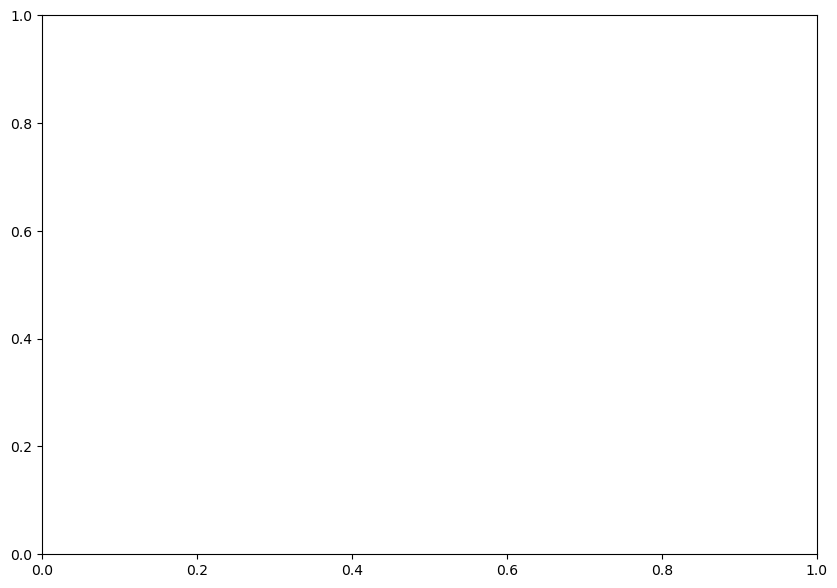

In [15]:
fig, axes = plt.subplots(figsize=(10,7))
sns.heatmap(data=df_pivot, annot=True, linewidths=.5, cmap='icefire')
plt.show()

`fmt` is a string formatting code to use when adding annotations. `fmt="0.f"` it changes the default scientific notation to "zero" decimal precision. It could be no decimal precision or one or two decimal precision. It will depend on your use case

* Can you identify the quarter where the GDP is typically higher? You may say in the Q4 of the year.
* Can you notice that the levels have increased over the years?
* Can you show the Covid19 pandemic periods on the heatmap?

In [ ]:
fig, axes = plt.subplots(figsize=(10,7))
sns.heatmap(data=df_pivot, annot=True, fmt=".0f", linewidths=.5, cmap='icefire')
plt.show()

### Line Plot

A line plot displays information as a series of data points in a two-dimensional chart - x and y-axis. Line plots are fundamental for visualising data trends over time (time series) or ordered categories. They can be used to track changes over intervals, highlighting trends, growth, or cycles in the data.

* **When to Use:** Ideal for any time series analysis, or when data needs to be displayed as a continuous curve to show trends. This is perhaps the most direct method for observing how variables evolve over time or through a sequence.
* **Example Application:** Frequently used in economic data analysis like tracking stock prices, GDP growth over years, or in science to plot changes in temperature, population growth, or similar metrics over time.
* It allows you to see the relationship between variables

Let's generate some data with NumPy; there are three columns created with mathematical functions
* For the purpose of the exercise, let's imagine they are a business metric, like Demand, Margin, and user clicks

In [24]:
np.random.seed(seed=1)
x= np.linspace(start=0,stop=10,num=50)
df = pd.DataFrame(data={"Demand":np.random.randn(50) + 5,
                        "Margin":np.sin(3*x),
                        "UserClicks":15 + np.cos(2*x) * x,
})

df.head(3)

,Demand,Margin,UserClicks
0,6.624345,0.000000,15.000000
1,4.388244,0.574706,15.187317
2,4.471828,0.940633,15.279552


We use `sns.lineplot()`, the documentation is [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html). When you  parse the dataset, it plots a line plot for each numerical variable in the y axis and the x axis is the index
* Alternatively, you can manually set the y and x. In our case, we just parsed the data

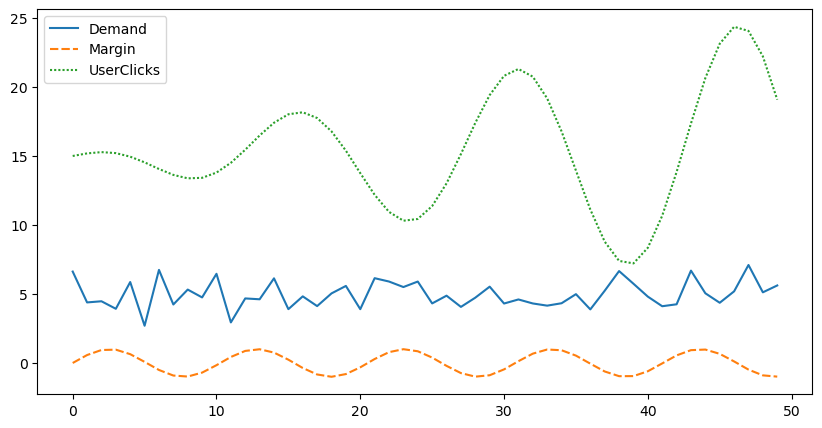

In [27]:
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
plt.show()

### Categorical Plot

According to Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot), a Count Plot shows the counts of observations in each categorical bin using bars. A count plot can be considered a histogram across a categorical instead of a quantitative variable. `catplot` is for drawing categorical plots onto a figure, making it easy to separate plots by categorical classes. It can create various kinds of plots, including bar plots, box plots, violin plots, and point plots.

* **When to Use:** This is used when you need to compare data across categorical variables and want to see the distribution of a variable or compare several groups. It’s extremely useful for analyses where categorical data segmentation is critical.
* **Example Application:** Useful in market research for comparing customer satisfaction ratings across products or demographic groups, in medicine for comparing drug efficacy across different patient groups, or in surveys to visualise responses across multiple choice questions.

In [30]:
df = pd.read_csv('insurance.csv')
df = df.sample(n=200, random_state=1)
df.head(3)

,age,sex,bmi,children,smoker,region,expenses
559,19,male,35.5,0,no,northwest,1646.43
1087,57,male,31.5,0,no,northwest,11353.23
1020,51,male,37.0,0,no,southwest,8798.59


We use `sns.countplot()` to generate a count plot; the documentation is [here](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot). The arguments we pass are:
* data as the DataFrane, and x for the categorical variable we want to know plot the count

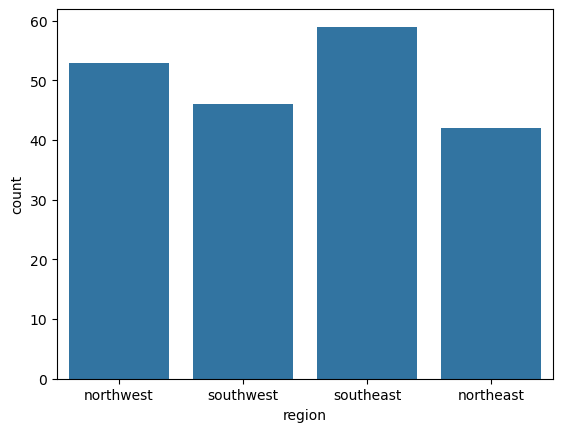

In [33]:
sns.countplot(data=df, x="region")
plt.show()

You can add a ``hue`` parameter, which will be a categorical variable too. In that way, you can see the frequencies of a given variable on another variable
* You will notice the bars are not stacked; they are side by side

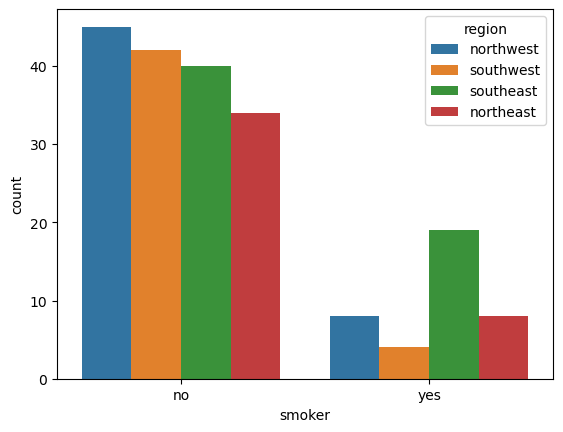

In [38]:
sns.countplot(data=df, x="smoker", hue='region')
plt.show()

The function `sns.countplot()` does not offer a stacked bar plot. To have the same effect as a stacked bar plot, you can use `sns.distplot() `

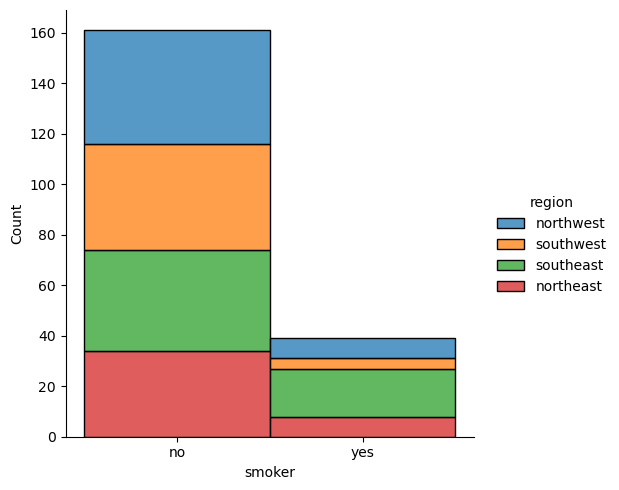

In [41]:
sns.displot(df, x='smoker', hue='region', multiple='stack')
plt.show()

Alternatively, you can consider Pandas' built-in plotting capabilities. The central aspect is that you have options when you want to deliver a stacked bar plot

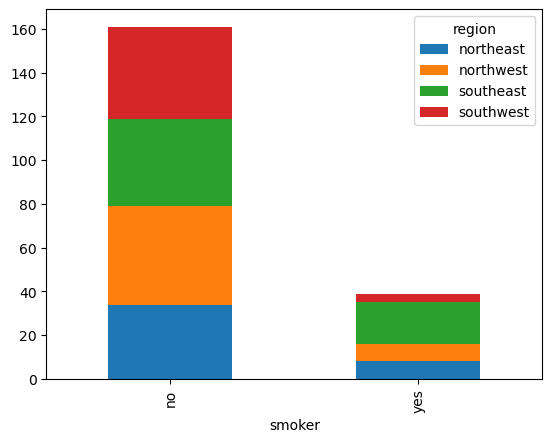

In [44]:
df.groupby(['smoker','region']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [46]:
df_practice = sns.load_dataset('tips')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
